In [1]:
using Revise
using OrdinaryDiffEq, ParameterizedFunctions, ODE, ODEInterfaceDiffEq, LSODA,
      Sundials, DiffEqDevTools

┌ Info: Precompiling OrdinaryDiffEq [1dea7af3-3e70-54e6-95c3-0bf5283fa5ed]
└ @ Base loading.jl:1260


# Testing benchmarks of Explicit Extrapolation Methods

## 1. Defining Lotka Volterra

In [2]:
f = @ode_def LotkaVolterra begin
  dx = a*x - b*x*y
  dy = -c*y + d*x*y
end a b c d

p = [1.5,1.0,3.0,1.0]
prob = ODEProblem(f,[1.0;1.0],(0.0,10.0),p)

abstols = 1.0 ./ 10.0 .^ (6:13)
reltols = 1.0 ./ 10.0 .^ (3:10);
sol = solve(prob,Vern7(),abstol=1/10^14,reltol=1/10^14)
test_sol = TestSolution(sol)
using Plots; gr()

Plots.GRBackend()

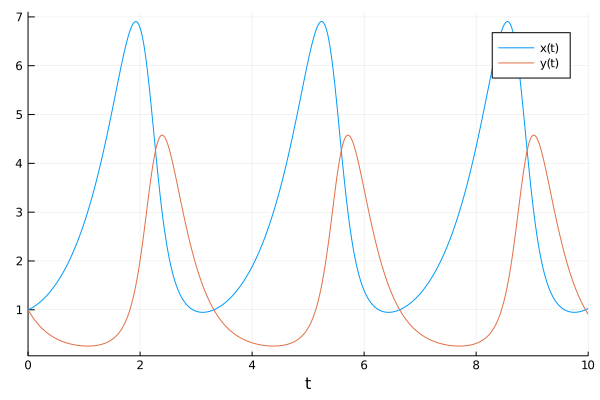

In [3]:
plot(sol)

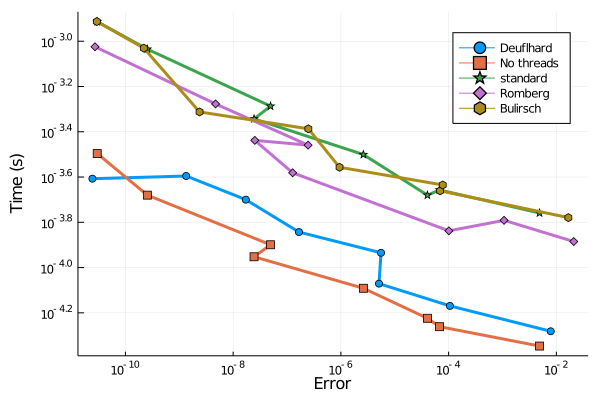

In [16]:
setups = [Dict(:alg=>ExtrapolationMidpointDeuflhard(max_order=9, init_order=9, threading=false))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(min_order=2, max_order=11, init_order=4, threading=false))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(min_order=2, max_order=11, init_order=4, threading=true))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(min_order=2, max_order=11, init_order=4, sequence = :romberg, threading=true))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(min_order=2, max_order=11, init_order=4, sequence = :bulirsch, threading=true))]
solnames = ["Deuflhard","No threads","standard","Romberg","Bulirsch"]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;appxsol=test_sol,names=solnames,
                      save_everystep=false,verbose=false,numruns=100)
plot(wp)

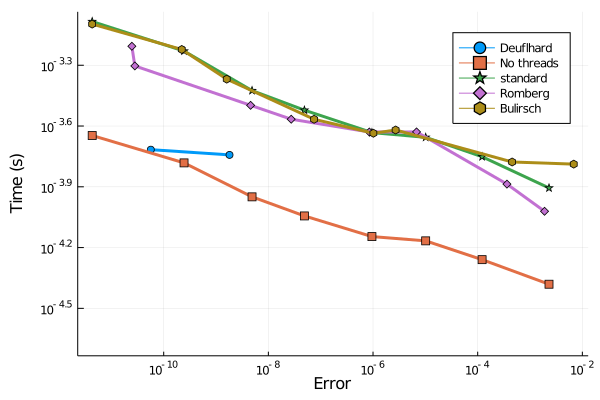

In [18]:
setups = [Dict(:alg=>ExtrapolationMidpointDeuflhard(max_order=9, init_order=9, threading=false, sequence_factor=4))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(min_order=2, max_order=11, init_order=4, threading=false, sequence_factor=4))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(min_order=2, max_order=11, init_order=4, threading=true, sequence_factor=4))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(min_order=2, max_order=11, init_order=4, sequence = :romberg, threading=true, sequence_factor=4))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(min_order=2, max_order=11, init_order=4, sequence = :bulirsch, threading=true, sequence_factor=4))]
solnames = ["Deuflhard","No threads","standard","Romberg","Bulirsch"]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;appxsol=test_sol,names=solnames,
                      save_everystep=false,verbose=false,numruns=100)
plot(wp)

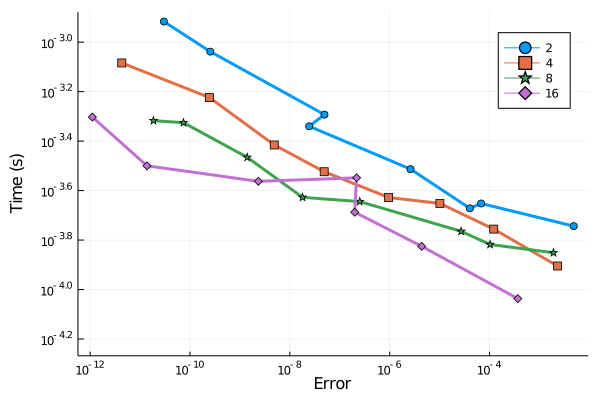

In [24]:
setups = [Dict(:alg=>ExtrapolationMidpointHairerWanner(min_order=2, max_order=11, init_order=4, threading=true, sequence_factor=2))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(min_order=2, max_order=11, init_order=4, threading=true, sequence_factor=4))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(min_order=2, max_order=11, init_order=4, threading=true, sequence_factor=8))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(min_order=2, max_order=11, init_order=4, threading=true, sequence_factor=16))]
solnames = ["2","4","8","16"]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;appxsol=test_sol,names=solnames,
                      save_everystep=false,verbose=false,numruns=100)
plot(wp)

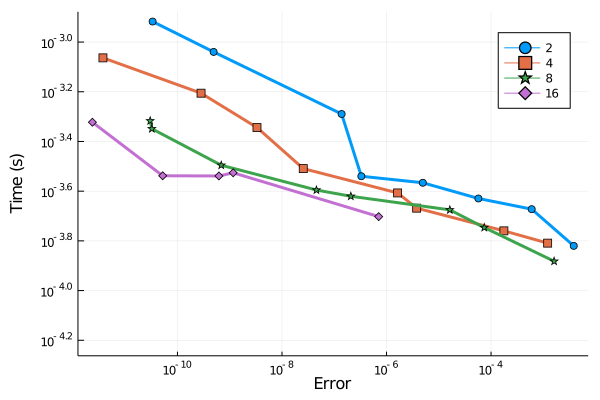

In [25]:
setups = [Dict(:alg=>ExtrapolationMidpointHairerWanner(sequence_factor=2))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(sequence_factor=4))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(sequence_factor=8))
          Dict(:alg=>ExtrapolationMidpointHairerWanner(sequence_factor=16))]
solnames = ["2","4","8","16"]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;appxsol=test_sol,names=solnames,
                      save_everystep=false,verbose=false,numruns=100)
plot(wp)